In [1]:
import pandas as pd

df = pd.read_csv(r"D:\toka\depi\2nd ml session\task\train.csv", index_col=0)
pd.set_option("display.max_rows", 5)

In [2]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [4]:
# Check duplicates
print(df.duplicated().sum())

0


In [5]:
# Selecting only categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category'])

# Get unique values for each categorical column
unique_values_dict = {col: df[col].unique() for col in categorical_cols}

print(unique_values_dict)


{'MSZoning': array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object), 'Street': array(['Pave', 'Grvl'], dtype=object), 'Alley': array([nan, 'Grvl', 'Pave'], dtype=object), 'LotShape': array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object), 'LandContour': array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object), 'Utilities': array(['AllPub', 'NoSeWa'], dtype=object), 'LotConfig': array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object), 'LandSlope': array(['Gtl', 'Mod', 'Sev'], dtype=object), 'Neighborhood': array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object), 'Condition1': array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object), 'Condition2': array(['Norm', 'Artery', 'RRNn', 'Feed

In [6]:
# show all rows
pd.set_option('display.max_rows', None)
print(df.isnull().sum())

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [7]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


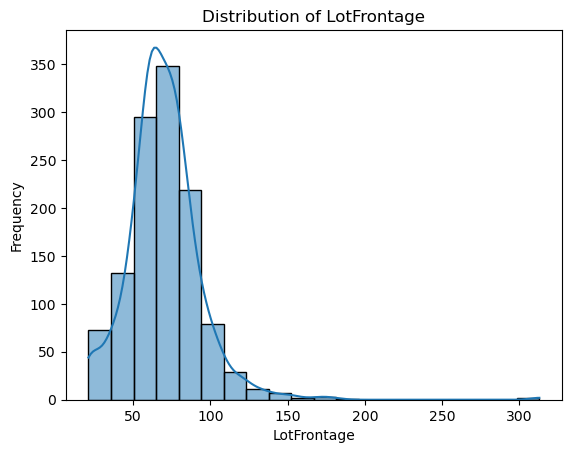

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of LotFrontage to see its distribution
sns.histplot(df['LotFrontage'], bins=20, kde=True)
plt.title("Distribution of LotFrontage")
plt.xlabel("LotFrontage")
plt.ylabel("Frequency")
plt.show()

In [9]:
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_18340\3505941688.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)


In [10]:
df.drop(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)


In [11]:
df.dropna(subset=['MasVnrArea', 'Electrical'], inplace=True)

In [12]:
print(df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']].dtypes)

BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
dtype: object


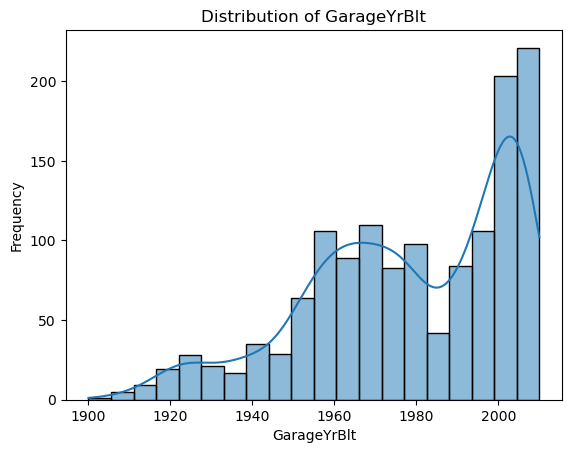

In [13]:
# Histogram of GarageYrBlt to see its distribution
sns.histplot(df['GarageYrBlt'], bins=20, kde=True)
plt.title("Distribution of GarageYrBlt")
plt.xlabel("GarageYrBlt")
plt.ylabel("Frequency")
plt.show()

In [14]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_18340\735951760.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(), inplace=True)


In [15]:
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace=True)
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace=True)
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace=True)
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace=True)
df['GarageType'].fillna(df['GarageType'].mode()[0], inplace=True)
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace=True)
df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace=True)
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_18340\2431477288.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_18340\2431477288.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [16]:
print(df.isnull().sum().sum() == 0)  # Returns True if no nulls, False otherwise

True


In [17]:
null_counts = df.isnull().sum()
print(null_counts[null_counts > 0])

Series([], dtype: int64)


In [18]:
print(df[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']])

     BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 GarageType  \
Id                                                                         
1          Gd       TA           No          GLQ          Unf     Attchd   
2          Gd       TA           Gd          ALQ          Unf     Attchd   
3          Gd       TA           Mn          GLQ          Unf     Attchd   
4          TA       Gd           No          ALQ          Unf     Detchd   
5          Gd       TA           Av          GLQ          Unf     Attchd   
6          Gd       TA           No          GLQ          Unf     Attchd   
7          Ex       TA           Av          GLQ          Unf     Attchd   
8          Gd       TA           Mn          ALQ          BLQ     Attchd   
9          TA       TA           No          Unf          Unf     Detchd   
10         TA       TA           No          GLQ          Unf     Attchd   
11         TA       TA           No          Rec          Unf     Detchd   
12         E

In [19]:
print(df.shape) 

(1451, 74)


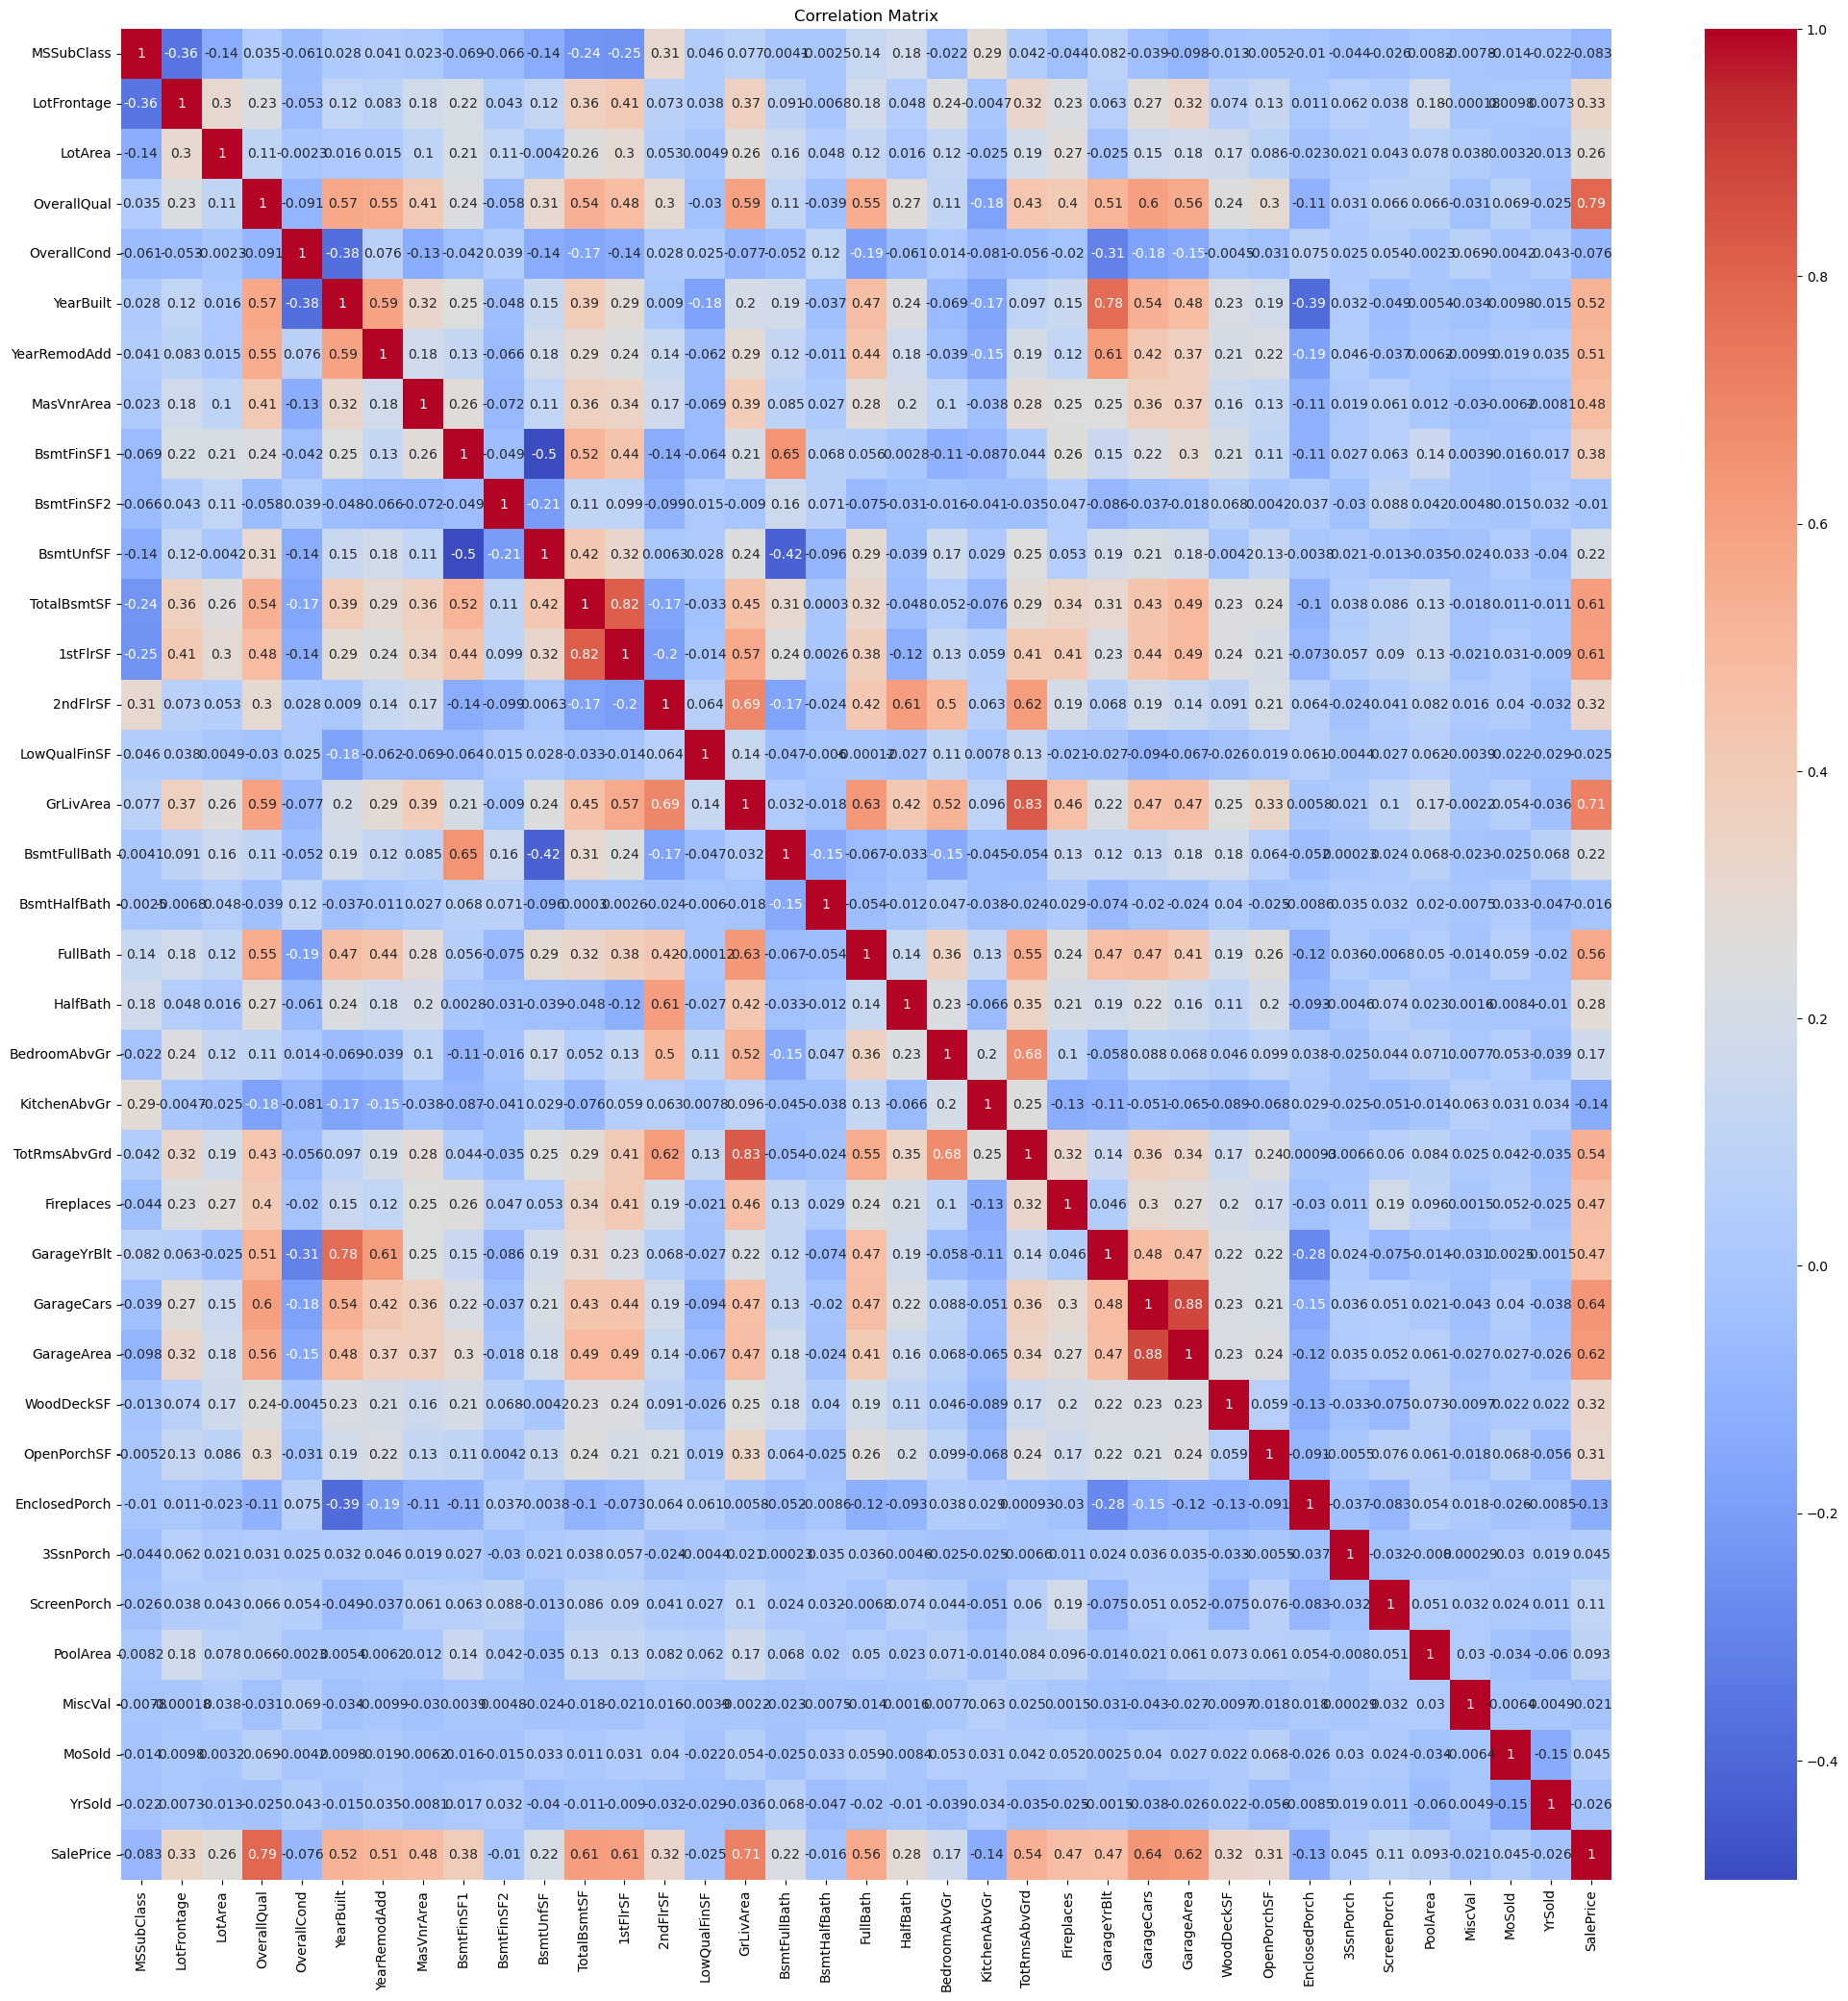

In [20]:
# Select only numerical columns for the correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Simple Linear Regression

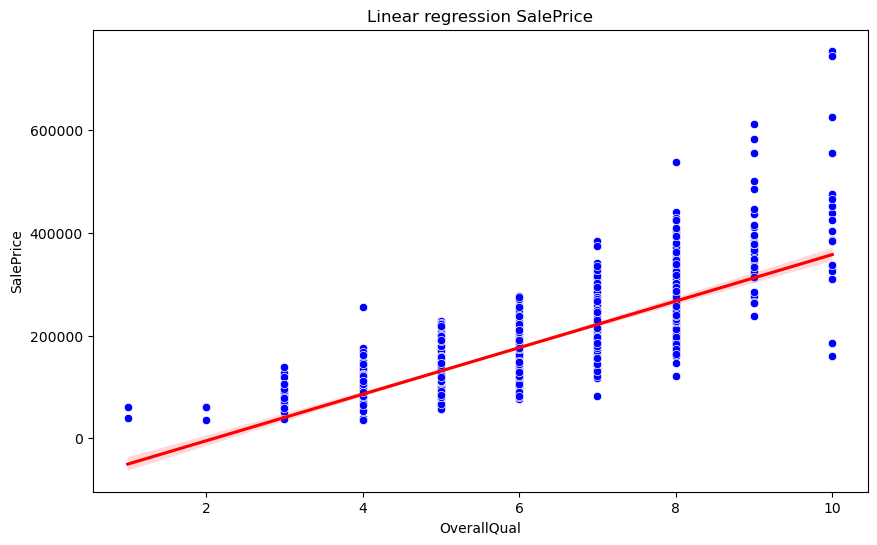

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='OverallQual',y='SalePrice',data=df,color = 'b')
sns.regplot(x='OverallQual',y='SalePrice',data=df ,scatter=False,color='r')
plt.title('Linear regression SalePrice')
plt.show()

In [22]:
x = df[['OverallQual']]
y = df['SalePrice']

In [23]:
# %pip install scikit-learn

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split


from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score  # metrices that make evaluation to the model

In [25]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)
x_train , x_val , y_train , y_val = train_test_split(x_train,y_train,test_size=0.125,shuffle=True,random_state=42)

In [26]:
print(f'x train shape:{x_train.shape}')
print(f'y train shape:{y_train.shape}')
print(f'x test shape:{x_test.shape}')
print(f'y test shape:{y_test.shape}')

x train shape:(1015, 1)
y train shape:(1015,)
x test shape:(291, 1)
y test shape:(291,)


In [27]:
# load the model
lr_model = LinearRegression()

In [28]:
# train the model
lr_model.fit(x_train, y_train)

LinearRegression()

In [29]:
lr_model.score(x_train, y_train) # r2_score, evaluates model performance

0.6063344482513054

In [30]:
lr_model.score(x_val, y_val) # if the output of previous cell is much larger than the output of this cell then there is overfitting

0.6733577211789201

In [31]:
y_pred = lr_model.predict(x_test)

In [32]:
# evaluation
# R squared error, the important one
score_1 = r2_score(y_test, y_pred)

# Mean Absolute Error
score_2 = mean_absolute_error(y_test, y_pred)

#mean squared error

score_3 = mean_squared_error(y_test, y_pred)

print('R2 Score : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)

R2 Score :  0.6651770843558391
Mean Absolute Error :  30732.874685609804
Mean Squared Error :  1867997026.867367


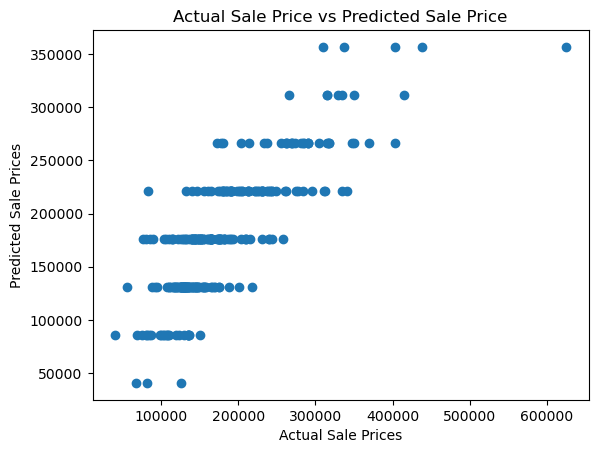

In [33]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sale Prices")
plt.ylabel("Predicted Sale Prices")
plt.title("Actual Sale Price vs Predicted Sale Price")
plt.show()
# it should be positive linear relation

Multiple Linear Regression

In [34]:
# LinearRegression model requires all input features (x) and target variables (y) to be numeric. So we use one hot encoding for datasets with small no. of columns, and Label encoding with datasets with large no. of columns
from sklearn.preprocessing import LabelEncoder

non_numeric_columns = df.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()
for col in non_numeric_columns:
    df[col] = le.fit_transform(df[col])

In [35]:
x = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [36]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)
x_train , x_val , y_train , y_val = train_test_split(x_train,y_train,test_size=0.125,shuffle=True,random_state=42)

In [37]:
print(f'x train shape:{x_train.shape}')
print(f'y train shape:{y_train.shape}')
print(f'x test shape:{x_test.shape}')
print(f'y test shape:{y_test.shape}')

x train shape:(1015, 73)
y train shape:(1015,)
x test shape:(291, 73)
y test shape:(291,)


In [38]:
lr_model = LinearRegression()

In [39]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [40]:
lr_model.score(x_train, y_train)

0.8354522392463608

In [41]:
lr_model.score(x_val, y_val)

0.8835564454282555

In [42]:
y_pred = lr_model.predict(x_test)

In [43]:
# R squared error
score_1 = r2_score(y_test, y_pred)

# Mean Absolute Error
score_2 = mean_absolute_error(y_test, y_pred)

#mean squared error

score_3 = mean_squared_error(y_test, y_pred)

print('R2 Score : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)

R2 Score :  0.8578341004631875
Mean Absolute Error :  20218.39054019331
Mean Squared Error :  793152037.2366775


In [44]:
# or by using Standardization, an optional processing step
scaler = StandardScaler()

# standardizing the features
x_train_Scaled = scaler.fit_transform(x_train)
x_test_Scaled  = scaler.transform(x_test)

In [45]:
lr_model = LinearRegression()

In [46]:
lr_model.fit(x_train_Scaled, y_train)

LinearRegression()

In [47]:
y_pred = lr_model.predict(x_test_Scaled)

In [48]:
# R squared error
score_1 = r2_score(y_test, y_pred)

# Mean Absolute Error
score_2 = mean_absolute_error(y_test, y_pred)

#mean squared error

score_3 = mean_squared_error(y_test, y_pred)

print('R2 Score : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)

R2 Score :  0.8573544842773642
Mean Absolute Error :  20226.338423455894
Mean Squared Error :  795827844.5583836


Lasso Regression (Linear Regression), decreases overfitting if exists

In [49]:
from sklearn.linear_model import Lasso , Ridge , LinearRegression
from sklearn.model_selection import GridSearchCV

with one feature

In [50]:
x = df[['OverallQual']]
y = df['SalePrice']

In [51]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)
x_train , x_val , y_train , y_val = train_test_split(x_train,y_train,test_size=0.125,shuffle=True,random_state=42)

In [52]:
print(f'x train shape:{x_train.shape}')
print(f'y train shape:{y_train.shape}')
print(f'x test shape:{x_test.shape}')
print(f'y test shape:{y_test.shape}')

x train shape:(1015, 1)
y train shape:(1015,)
x test shape:(291, 1)
y test shape:(291,)


In [53]:
lasso_model = Lasso()

In [54]:
lasso_model.fit(x_train, y_train)

Lasso()

In [55]:
lasso_model.score(x_train, y_train)

0.6063344481698554

In [56]:
lasso_model.score(x_val, y_val)

0.673357170019486

In [57]:
y_pred = lasso_model.predict(x_test)

In [58]:
# R squared error, the important one
score_1 = r2_score(y_test, y_pred)

# Mean Absolute Error
score_2 = mean_absolute_error(y_test, y_pred)

#mean squared error

score_3 = mean_squared_error(y_test, y_pred)

print('R2 Score : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)

R2 Score :  0.6651769282650057
Mean Absolute Error :  30732.85789067079
Mean Squared Error :  1867997897.7074413


with multiple features

In [59]:
# LinearRegression model requires all input features (x) and target variables (y) to be numeric. So we use one hot encoding for datasets with small no. of columns, and Label encoding with datasets with large no. of columns
from sklearn.preprocessing import LabelEncoder

non_numeric_columns = df.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()
for col in non_numeric_columns:
    df[col] = le.fit_transform(df[col])

In [60]:
x = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [61]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)
x_train , x_val , y_train , y_val = train_test_split(x_train,y_train,test_size=0.125,shuffle=True,random_state=42)

In [62]:
print(f'x train shape:{x_train.shape}')
print(f'y train shape:{y_train.shape}')
print(f'x test shape:{x_test.shape}')
print(f'y test shape:{y_test.shape}')

x train shape:(1015, 73)
y train shape:(1015,)
x test shape:(291, 73)
y test shape:(291,)


In [63]:
lasso_model = Lasso()

In [64]:
lasso_model.fit(x_train, y_train)

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.301e+10, tolerance: 6.512e+08
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [65]:
lasso_model.score(x_train, y_train)

0.835451948448408

In [66]:
lasso_model.score(x_val, y_val)

0.8835750523773164

In [67]:
y_pred = lasso_model.predict(x_test)

In [68]:
# R squared error, the important one
score_1 = r2_score(y_test, y_pred)

# Mean Absolute Error
score_2 = mean_absolute_error(y_test, y_pred)

#mean squared error

score_3 = mean_squared_error(y_test, y_pred)

print('R2 Score : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)

R2 Score :  0.8578339465365714
Mean Absolute Error :  20213.551921504295
Mean Squared Error :  793152896.0024549


In [69]:
# or by using Standardization
scaler = StandardScaler()

# standardizing the features
x_train_Scaled = scaler.fit_transform(x_train)
x_test_Scaled  = scaler.transform(x_test)

In [70]:
lasso_model = Lasso()

In [71]:
lasso_model.fit(x_train_Scaled, y_train)

Lasso()

In [72]:
y_pred = lasso_model.predict(x_test_Scaled)

In [73]:
# R squared error, the important one
score_1 = r2_score(y_test, y_pred)

# Mean Absolute Error
score_2 = mean_absolute_error(y_test, y_pred)

#mean squared error

score_3 = mean_squared_error(y_test, y_pred)

print('R2 Score : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)

R2 Score :  0.8578553938109339
Mean Absolute Error :  20215.11567812133
Mean Squared Error :  793033240.3789247


Ridge Regression (Linear Regression)

with one feature

In [74]:
x = df[['OverallQual']]
y = df['SalePrice']

In [75]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)
x_train , x_val , y_train , y_val = train_test_split(x_train,y_train,test_size=0.125,shuffle=True,random_state=42)

In [76]:
print(f'x train shape:{x_train.shape}')
print(f'y train shape:{y_train.shape}')
print(f'x test shape:{x_test.shape}')
print(f'y test shape:{y_test.shape}')

x train shape:(1015, 1)
y train shape:(1015,)
x test shape:(291, 1)
y test shape:(291,)


In [77]:
ridge_model = Ridge()

In [78]:
ridge_model.fit(x_train, y_train)

Ridge()

In [79]:
ridge_model.score(x_train, y_train)

0.6063342877047262

In [80]:
ridge_model.score(x_val, y_val)

0.6733330880891384

In [81]:
y_pred = ridge_model.predict(x_test)

In [82]:
# R squared error, the important one
score_1 = r2_score(y_test, y_pred)

# Mean Absolute Error
score_2 = mean_absolute_error(y_test, y_pred)

#mean squared error

score_3 = mean_squared_error(y_test, y_pred)

print('R2 Score : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)

R2 Score :  0.6651699856973221
Mean Absolute Error :  30732.408035135166
Mean Squared Error :  1868036630.7068446


with multiple features

In [83]:
# LinearRegression model requires all input features (x) and target variables (y) to be numeric. So we use one hot encoding for datasets with small no. of columns, and Label encoding with datasets with large no. of columns
from sklearn.preprocessing import LabelEncoder

non_numeric_columns = df.select_dtypes(include=['object', 'category']).columns
le = LabelEncoder()
for col in non_numeric_columns:
    df[col] = le.fit_transform(df[col])

In [84]:
x = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

In [85]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)
x_train , x_val , y_train , y_val = train_test_split(x_train,y_train,test_size=0.125,shuffle=True,random_state=42)

In [86]:
print(f'x train shape:{x_train.shape}')
print(f'y train shape:{y_train.shape}')
print(f'x test shape:{x_test.shape}')
print(f'y test shape:{y_test.shape}')

x train shape:(1015, 73)
y train shape:(1015,)
x test shape:(291, 73)
y test shape:(291,)


In [87]:
ridge_model = Ridge()

In [88]:
ridge_model.fit(x_train, y_train)

Ridge()

In [89]:
ridge_model.score(x_train, y_train)

0.8353404089034455

In [90]:
ridge_model.score(x_val, y_val)

0.8836247175415414

In [91]:
y_pred = ridge_model.predict(x_test)

In [92]:
# R squared error, the important one
score_1 = r2_score(y_test, y_pred)

# Mean Absolute Error
score_2 = mean_absolute_error(y_test, y_pred)

#mean squared error

score_3 = mean_squared_error(y_test, y_pred)

print('R2 Score : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)

R2 Score :  0.857705828017071
Mean Absolute Error :  20191.938171543683
Mean Squared Error :  793867676.8681941


In [93]:
# or by using Standardization
scaler = StandardScaler()

# standardizing the features
x_train_Scaled = scaler.fit_transform(x_train)
x_test_Scaled  = scaler.transform(x_test)

In [94]:
ridge_model = Ridge()

In [95]:
ridge_model.fit(x_train_Scaled, y_train)

Ridge()

In [96]:
y_pred = ridge_model.predict(x_test_Scaled)

In [97]:
# R squared error, the important one
score_1 = r2_score(y_test, y_pred)

# Mean Absolute Error
score_2 = mean_absolute_error(y_test, y_pred)

#mean squared error

score_3 = mean_squared_error(y_test, y_pred)

print('R2 Score : ', score_1)
print('Mean Absolute Error : ', score_2)
print('Mean Squared Error : ', score_3)

R2 Score :  0.85792479675456
Mean Absolute Error :  20203.80874495398
Mean Squared Error :  792646037.2148285


The best models are the models with the highest r2 score which is equal to 0.85:  
Multiple linear regression with, or without standardization  
Lasso regression with multiple features with, or without standardization  
Ridge regression with multiple features with, or without standardization